# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [3]:
cities

['pa sang',
 'port alfred',
 'stoyba',
 'batemans bay',
 'butaritari',
 'victoria',
 'port elizabeth',
 'kahului',
 'taolanaro',
 'jamestown',
 'rikitea',
 'alta floresta',
 'saleaula',
 'lebork',
 'ushuaia',
 'ribeira grande',
 'khatanga',
 'lasa',
 'mandalgovi',
 'najran',
 'hilo',
 'broken hill',
 'mataura',
 'rawson',
 'meadow lake',
 'bluff',
 'kostomuksha',
 'bambous virieux',
 'biu',
 'hamilton',
 'sitka',
 'sao joao da barra',
 'arraial do cabo',
 'ulaangom',
 'elko',
 'tukrah',
 'qaanaaq',
 'vila velha',
 'talnakh',
 'sobreira',
 'nyurba',
 'temple',
 'cape town',
 'zyryanka',
 'upernavik',
 'port lincoln',
 'atuona',
 'port blair',
 'castle douglas',
 'farmington',
 'verkhnevilyuysk',
 'saskylakh',
 'lethem',
 'albany',
 'kruisfontein',
 'hithadhoo',
 'eydhafushi',
 'kodinsk',
 'liminangcong',
 'tuktoyaktuk',
 'katsuura',
 'udachnyy',
 'punta arenas',
 'guerrero negro',
 'gombong',
 'davila',
 'flinders',
 'padalarang',
 'bredasdorp',
 'tuatapere',
 'vaini',
 'salamiyah',
 'r

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print('Beginning Data Retrieval\n-----------------------------\n')

weather_list = []
rcd = 0
sets = 1

for city in cities:

    rcd += 1
    print(f'Processing Record {rcd} of Set {sets} | {city}')
    
    if rcd == 50:
        rcd = 0
        sets += 1
        
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
    
    weather = requests.get(url).json()
    
    try:
        weather_list.append({
            'city': city,
            'lat': weather['coord']['lat'],
            'lng': weather['coord']['lon'],
            'temp': weather['main']['temp_max'],
            'humidity': weather['main']['humidity'],
            'wind':weather['wind']['speed'],
            'cloudiness':weather['clouds']['all'],
            'country':weather['sys']['country'],
            'date':weather['dt']
        })
        
    except:
        print('City not found. Skipping...')
        pass
    
print('-----------------------------\nData Retrieval Complete\n-----------------------------')
        

Beginning Data Retrieval
-----------------------------

Processing Record 1 of Set 1 | pa sang
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | stoyba
City not found. Skipping...
Processing Record 4 of Set 1 | batemans bay
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | kahului
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | alta floresta
Processing Record 13 of Set 1 | saleaula
City not found. Skipping...
Processing Record 14 of Set 1 | lebork
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | lasa
Processing Record 19 of Set 1 | mandalgovi
Processing Record 20 of Set 1 | najran
Processing Record 21 of Set 1 | h

Processing Record 42 of Set 4 | svetlyy
Processing Record 43 of Set 4 | vidim
Processing Record 44 of Set 4 | taoudenni
Processing Record 45 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 46 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 47 of Set 4 | la macarena
Processing Record 48 of Set 4 | hofn
Processing Record 49 of Set 4 | mount gambier
Processing Record 50 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 1 of Set 5 | sabang
Processing Record 2 of Set 5 | amderma
City not found. Skipping...
Processing Record 3 of Set 5 | makakilo city
Processing Record 4 of Set 5 | xintai
Processing Record 5 of Set 5 | praia
Processing Record 6 of Set 5 | port hardy
Processing Record 7 of Set 5 | saint-pierre
Processing Record 8 of Set 5 | wamba
Processing Record 9 of Set 5 | porosozero
Processing Record 10 of Set 5 | tarrega
Processing Record 11 of Set 5 | phan rang
City not found. Skipping...
Processing Record 12 of Set 5 | 

Processing Record 29 of Set 8 | acarau
Processing Record 30 of Set 8 | senador jose porfirio
Processing Record 31 of Set 8 | belaya gora
Processing Record 32 of Set 8 | aparecida do taboado
Processing Record 33 of Set 8 | emba
Processing Record 34 of Set 8 | richards bay
Processing Record 35 of Set 8 | buala
Processing Record 36 of Set 8 | acapulco
Processing Record 37 of Set 8 | anloga
Processing Record 38 of Set 8 | quatre cocos
Processing Record 39 of Set 8 | bowen
Processing Record 40 of Set 8 | homer
Processing Record 41 of Set 8 | geraldton
Processing Record 42 of Set 8 | mayumba
Processing Record 43 of Set 8 | urusha
Processing Record 44 of Set 8 | vestmanna
Processing Record 45 of Set 8 | dafeng
Processing Record 46 of Set 8 | cayenne
Processing Record 47 of Set 8 | sebastian
Processing Record 48 of Set 8 | ossora
Processing Record 49 of Set 8 | kourou
Processing Record 50 of Set 8 | mangrol
Processing Record 1 of Set 9 | harper
Processing Record 2 of Set 9 | bereda
Processing 

Processing Record 17 of Set 12 | sao jose da coroa grande
Processing Record 18 of Set 12 | kalomo
City not found. Skipping...
Processing Record 19 of Set 12 | ambilobe
Processing Record 20 of Set 12 | lavrentiya
Processing Record 21 of Set 12 | praia da vitoria
Processing Record 22 of Set 12 | korla
Processing Record 23 of Set 12 | jacksonville
Processing Record 24 of Set 12 | petersburg
Processing Record 25 of Set 12 | tabou
Processing Record 26 of Set 12 | iralaya
Processing Record 27 of Set 12 | somerset
Processing Record 28 of Set 12 | escuinapa
Processing Record 29 of Set 12 | prince rupert
Processing Record 30 of Set 12 | albufeira
Processing Record 31 of Set 12 | owando
Processing Record 32 of Set 12 | almenara
Processing Record 33 of Set 12 | nortelandia
Processing Record 34 of Set 12 | valdivia
Processing Record 35 of Set 12 | necochea
Processing Record 36 of Set 12 | vardo
Processing Record 37 of Set 12 | ancud
Processing Record 38 of Set 12 | yurgamysh
Processing Record 39 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = pd.DataFrame(weather_list)
city_data.date = city_data.date.map(time.ctime)
city_data.to_csv('output_data/city_data.csv')
city_data.head()

,city,lat,lng,temp,humidity,wind,cloudiness,country,date
0,pa sang,18.5262,98.9394,80.01,94,4.61,40,TH,Sat May 1 09:30:41 2021
1,port alfred,-33.5906,26.8910,62.17,65,2.77,0,ZA,Sat May 1 09:30:42 2021
2,batemans bay,-35.7167,150.1833,57.99,96,1.01,100,AU,Sat May 1 09:30:42 2021
3,butaritari,3.0707,172.7902,82.20,75,9.37,100,KI,Sat May 1 09:30:43 2021
4,victoria,22.2855,114.1577,80.01,80,6.53,80,HK,Sat May 1 09:29:26 2021


In [6]:
city_data.describe()

,lat,lng,temp,humidity,wind,cloudiness
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,19.952885,12.308596,63.870965,66.929825,7.785000,55.163158
std,32.560448,90.052746,20.329682,22.562282,4.944449,37.040419
min,-54.800000,-179.166700,-5.840000,7.000000,0.290000,0.000000
25%,-7.167325,-66.214700,51.850000,52.000000,4.000000,20.000000
50%,22.180350,17.400000,68.000000,70.500000,6.910000,64.000000
75%,46.570925,91.773000,79.267500,86.000000,10.650000,90.000000
max,78.218600,179.316700,105.800000,100.000000,34.520000,100.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
city_data = city_data.loc[city_data["humidity"]<= 100]
city_data.head()

,city,lat,lng,temp,humidity,wind,cloudiness,country,date
0,pa sang,18.5262,98.9394,80.01,94,4.61,40,TH,Sat May 1 09:30:41 2021
1,port alfred,-33.5906,26.8910,62.17,65,2.77,0,ZA,Sat May 1 09:30:42 2021
2,batemans bay,-35.7167,150.1833,57.99,96,1.01,100,AU,Sat May 1 09:30:42 2021
3,butaritari,3.0707,172.7902,82.20,75,9.37,100,KI,Sat May 1 09:30:43 2021
4,victoria,22.2855,114.1577,80.01,80,6.53,80,HK,Sat May 1 09:29:26 2021


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

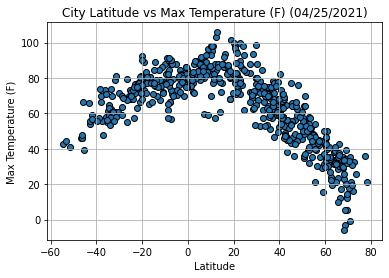

In [9]:
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (F) (04/25/2021)')
plt.scatter(city_data['lat'],city_data['temp'],edgecolor='black', linewidths=1,)
plt.savefig("output_data/city_lat_vs_max_temp.png")

## Latitude vs. Humidity Plot

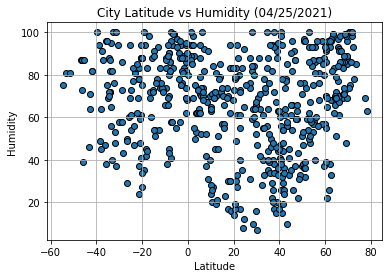

In [10]:
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity (04/25/2021)')
plt.scatter(city_data['lat'],city_data['humidity'],edgecolor='black', linewidths=1,)
plt.savefig("output_data/City_Lat_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

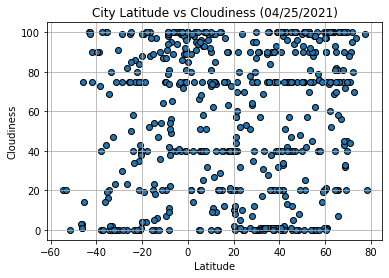

In [11]:
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness (04/25/2021)')
plt.scatter(city_data['lat'],city_data['cloudiness'],edgecolor='black', linewidths=1,)
plt.savefig("output_data/City_Lat_vs Cloudiness_.png")

## Latitude vs. Wind Speed Plot

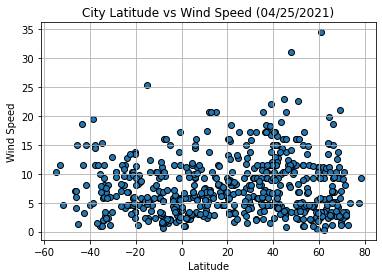

In [12]:
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed (04/25/2021)')
plt.scatter(city_data['lat'],city_data['wind'],edgecolor='black', linewidths=1,)
plt.savefig("output_data/City_Lat_vs_Wind_Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [13]:
northern_pd = city_data.loc[city_data["lat"]>= 0]
southern_pd = city_data.loc[city_data["lat"]<= 0]

The St. Pearson Correlation Coefficient between both factors is -0.88


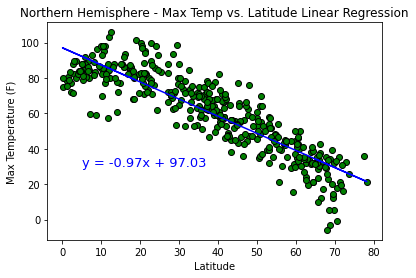

<Figure size 432x288 with 0 Axes>

In [14]:
# establish linear regression values = linregress(city_data ("lat","temp".values)
slope, intercept, rValue, pValue, stderror = linregress(northern_pd['lat'], northern_pd['temp'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(northern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(5,30), fontsize=13, color="blue")     
plt.plot(northern_pd['lat'],regress,"-",color="blue") 
plt.scatter(northern_pd['lat'],northern_pd['temp'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()
plt.savefig("output_data/Northern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is 0.73


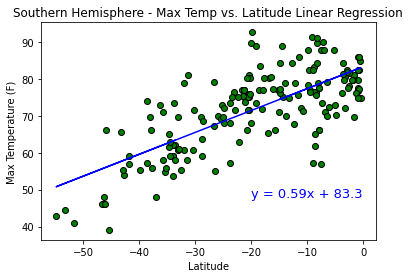

<Figure size 432x288 with 0 Axes>

In [15]:
# establish linear regression values = linregress(city_data ("lat","temp".values)
slope, intercept, rValue, pValue, stderror = linregress(southern_pd['lat'], southern_pd['temp'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(southern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(-20,48), fontsize=13, color="blue")     
plt.plot(southern_pd['lat'],regress,"-",color="blue") 
plt.scatter(southern_pd['lat'],southern_pd['temp'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()
plt.savefig("output_data/Southern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is 0.18


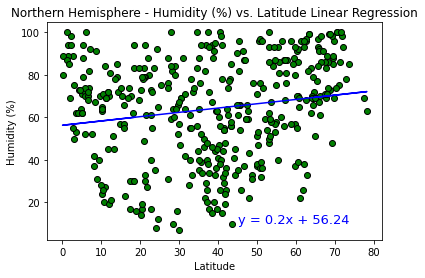

<Figure size 432x288 with 0 Axes>

In [16]:
# establish linear regression values = linregress(city_data ("lat","temp".values)
slope, intercept, rValue, pValue, stderror = linregress(northern_pd['lat'], northern_pd['humidity'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(northern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(45,10), fontsize=13, color="blue")     
plt.plot(northern_pd['lat'],regress,"-",color="blue") 
plt.scatter(northern_pd['lat'],northern_pd['humidity'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.show()
plt.savefig("output_data/Northern_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is 0.16


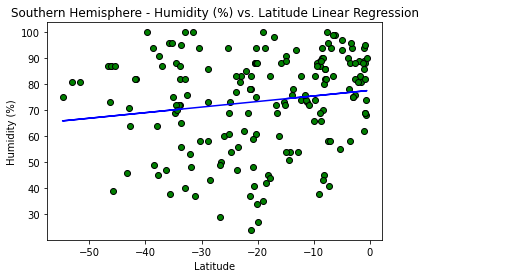

<Figure size 432x288 with 0 Axes>

In [17]:
# establish linear regression values 
slope, intercept, rValue, pValue, stderror = linregress(southern_pd['lat'], southern_pd['humidity'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')

# linear regression line 
regress = slope*(southern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(-50,20), fontsize=13, color="blue")     
plt.plot(southern_pd['lat'],regress,"-",color="blue") 
plt.scatter(southern_pd['lat'],southern_pd['humidity'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.annotate(regresstring, xy=(5,30), fontsize=13, color="blue") 
plt.show()
plt.savefig("output_data/Southern_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is 0.12


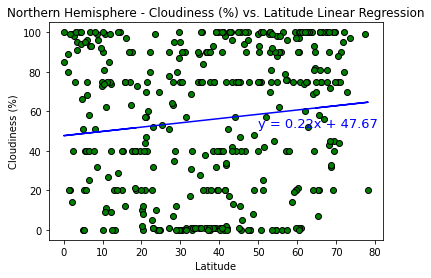

<Figure size 432x288 with 0 Axes>

In [18]:
establish_linear_regression_values = linregress(city_data["lat"], city_data["cloudiness"])
slope, intercept, rValue, pValue, stderror = linregress(northern_pd['lat'], northern_pd['cloudiness'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(northern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(50,52), fontsize=13, color="blue")     
plt.plot(northern_pd['lat'],regress,"-",color="blue") 
plt.scatter(northern_pd['lat'], northern_pd['cloudiness'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.show()
plt.savefig("output_data/Northern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is 0.35


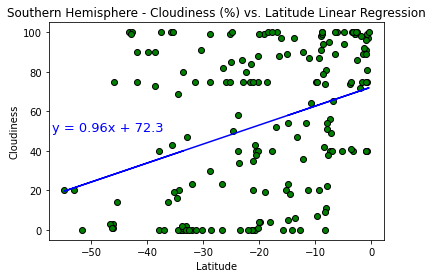

<Figure size 432x288 with 0 Axes>

In [19]:
# establish linear regression values 
slope, intercept, rValue, pValue, stderror = linregress(southern_pd['lat'], southern_pd['cloudiness'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(southern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(-57,50), fontsize=13, color="blue")     
plt.plot(southern_pd['lat'],regress,"-",color="blue") 
plt.scatter(southern_pd['lat'],southern_pd['cloudiness'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.show()
plt.savefig("output_data/Southern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is -0.0


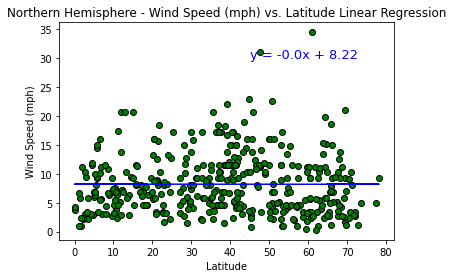

<Figure size 432x288 with 0 Axes>

In [20]:
# establish linear regression values = linregress(city_data ("lat","wind".values)
slope, intercept, rValue, pValue, stderror = linregress(northern_pd['lat'], northern_pd['wind'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(northern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(45,30), fontsize=13, color="blue")     
plt.plot(northern_pd['lat'],regress,"-",color="blue") 
plt.scatter(northern_pd['lat'],northern_pd['wind'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.show()
plt.savefig("output_data/Northern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is -0.19


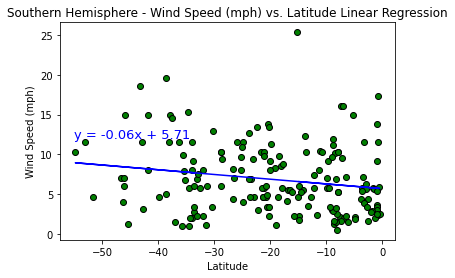

<Figure size 432x288 with 0 Axes>

In [21]:
# establish linear regression values = linregress(city_data ("lat","wind".values)
slope, intercept, rValue, pValue, stderror = linregress(southern_pd['lat'], southern_pd['wind'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(southern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(-55,12), fontsize=13, color="blue")     
plt.plot(southern_pd['lat'],regress,"-",color="blue") 
plt.scatter(southern_pd['lat'],southern_pd['wind'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.show()
plt.savefig("output_data/Southern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression.png")

In [ ]:
Summary
#As latitude increases so does max temperature
#Humidity and Cloudiness appear random in both hemispheres
#Windspeed is fairly constant across the northern latitudes
#Max temp and Latitude are strongly correlated in the the Northern Hemisphere